## Bike Sharing Assignment ##

#### Problem Statement ####
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.

#### Business Goal: ####
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
bikeShare = pd.read_csv("day.csv")
bikeShare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikeShare.shape

(730, 16)

In [5]:
bikeShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikeShare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bikeShare['dteday'] = bikeShare['dteday'].astype('datetime64')

In [8]:
def assign_season(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bikeShare[['season']] = bikeShare[['season']].apply(assign_season)
bikeShare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bikeShare[['yr']] = bikeShare[['yr']].astype('object')

In [10]:
def assign_mnth(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec',
    })

bikeShare[['mnth']] = bikeShare[['mnth']].apply(assign_mnth)
bikeShare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
bikeShare[['workingday']] = bikeShare[['workingday']].astype('object')
bikeShare[['holiday']] = bikeShare[['holiday']].astype('object')
bikeShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
def assign_weekday(x):
    return x.map({
        1:'Mon',
        2:'Tue',
        3:'Wed',
        4:'Thu',
        5:'Fri',
        6:'Sat',
        0:'Sun'
    })

bikeShare[['weekday']] = bikeShare[['weekday']].apply(assign_weekday)
bikeShare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thu,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
def assign_weathersit(x):
    return x.map({
        1:'Clear',
        2:'Mist',
        3:'LightSnow',
        4:'HeavyRain'
    })

bikeShare[['weathersit']] = bikeShare[['weathersit']].apply(assign_weathersit)
bikeShare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
bikeShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
bikeShare.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [16]:
num_cols = list(bikeShare.describe().columns)
num_cols

['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

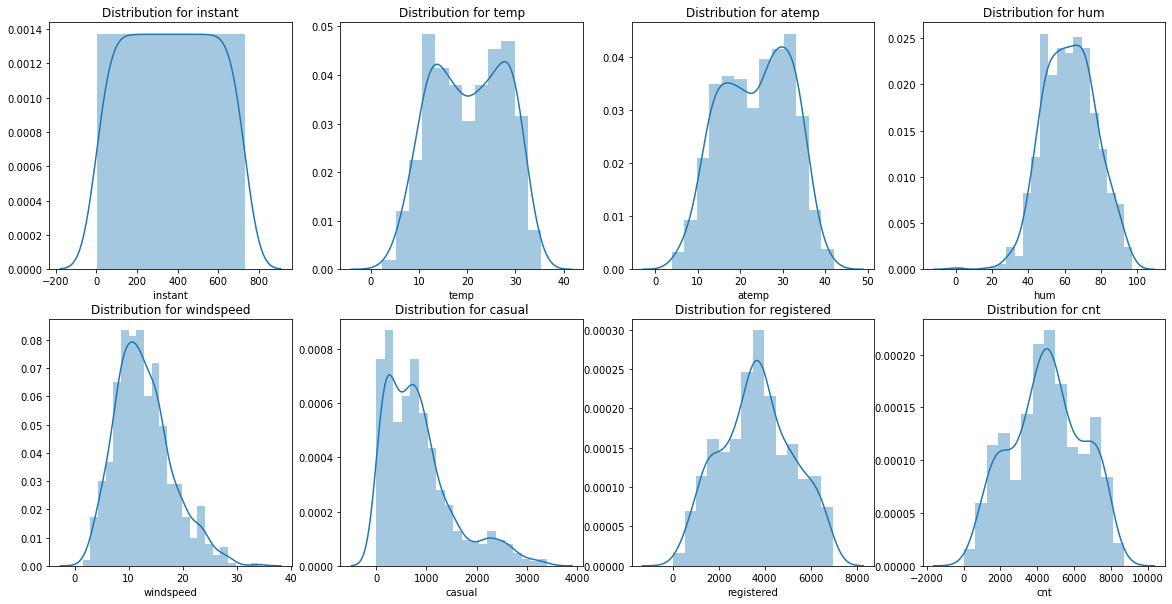

In [17]:
plt.figure(figsize=(20,10))
for i in range(1,len(num_cols)+1):
    plt.subplot(2,4,i)
    sns.distplot(bikeShare[num_cols[i-1]])
    plt.title("Distribution for "+num_cols[i-1])
plt.show()

The following variables have a **unimodal, normalized** distribution:
**instant, hum, windspeed, registered, cnt**

The following variables have a **bimodal** distribution:
**temp, atemp, casual**


In [18]:
cat_cols = list(bikeShare.select_dtypes(include=['object']).columns)
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

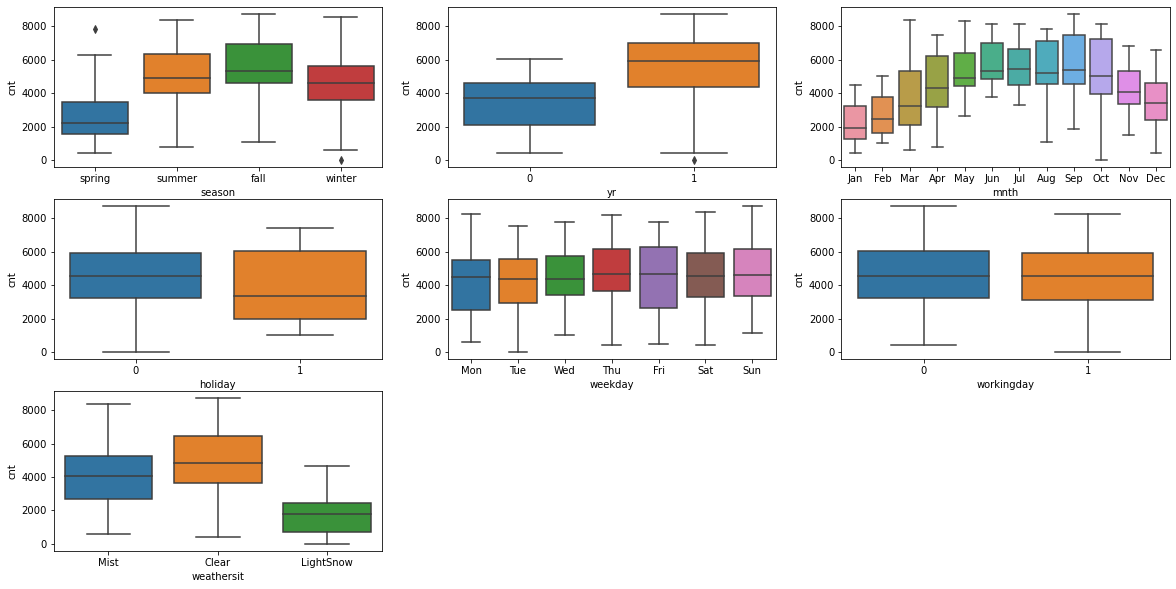

In [19]:
plt.figure(figsize=(20,10))
for i in range(1,len(cat_cols)+1):
    plt.subplot(3,3,i)
    sns.boxplot(x=cat_cols[i-1],y='cnt',data=bikeShare)
#     plt.title("Distribution for "+num_cols[i-1])
plt.show()

The following boxplots indicate the following about demand for shared bikes :
- **season** - Demand is highest in fall, though the medians for both fall and summer are very close. On the other hand, demand falls drastically in spring <\br>
- **yr** - Data indicates that demand increased in 2019 as compared to 2018
- **mnth** - Demand appears to be highest between May to October. This also matches the season data since Summer starts in June and Fall starts in September. 
- **holiday** - Data indicates a higher demand when the day is not a holiday though 75% quartile for both holiday and non-holidays is the same
- **weekday**- This plot shows almost equal demand from median on any day of the week though the 75% quartile is slightly higher on thursdays, Fridays and Sundays
- **workingday** - Data appears to indicate that there is not much difference in median whether day is a working day or not.
- **weathersit** - weathersit plot appears to indicate user preference of using bikes when the weather is clear or in case of mist with little demand when there is light snow and absolutely no demand with inclement/very bad weather conditions like heavy rains, thunderstorms and snow. This also corresponds to the season and mnth plots which are typically indicative of these weather situations.

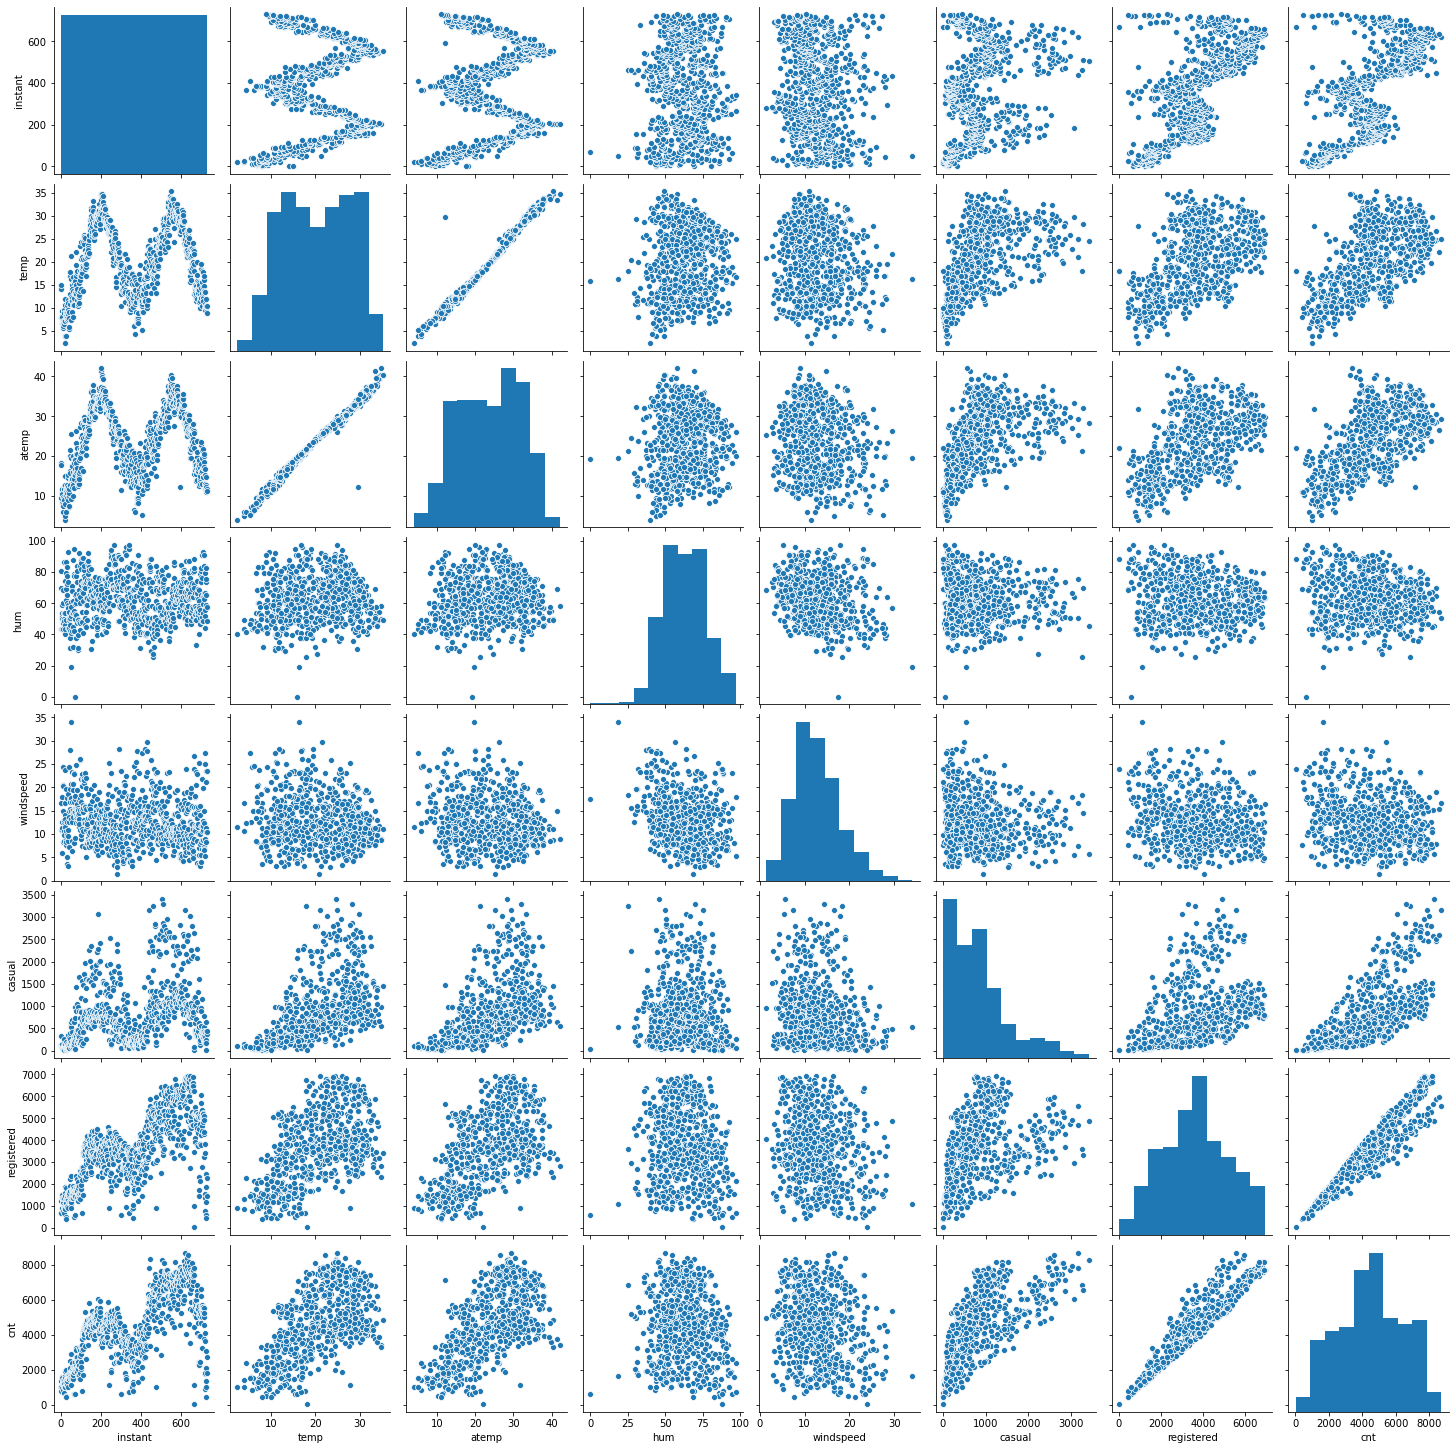

In [20]:
# Creating a pairplot for looking at relationship between different numerical variables
sns.pairplot (bikeShare, vars = num_cols)
plt.show()

**Insights from pairplots:**
- temp and atemp variables have a high linear correlation. This is also understandable from the definition of the terms, temp being actual temperature and atemp being felt temperature. We will need to drop one of these to avoid multicollinearity. This is also indicative in the plots of these two variables with other variables. The plots are almost exactly alike for these two variables when plotted against the remaining variables.
- cnt is the sum of registered and casual users. Hence there is a strong linear relationship between registered users and cnt, and casual and cnt though with more variance.
- There is a strong linear relationship between temp/atemp and cnt.

In [21]:
bikeShare[num_cols].corr()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
temp,0.150738,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.629896,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


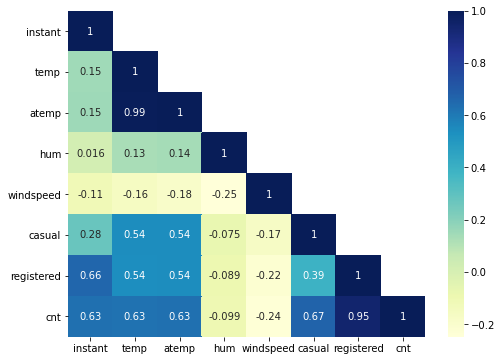

In [22]:
mask = np.array(bikeShare[num_cols].corr())
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(8,6))
sns.heatmap(bikeShare[num_cols].corr(),mask=mask,annot=True, cmap = 'YlGnBu');

## Step 2: Data Preparation

In [23]:
bikeShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

Using One-hot encoding to create dummy variables

In [24]:
bikeShareDummies = pd.get_dummies(bikeShare[cat_cols],drop_first=True)

In [25]:
bikeShareDummies.head()

,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_LightSnow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
bikeShare.drop(cat_cols,axis=1,inplace=True)

In [27]:
bikeShare=pd.concat([bikeShare,bikeShareDummies],axis=1)

In [28]:
bikeShare.head()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_LightSnow,weathersit_Mist
0,1,2018-01-01,14.110847,18.18125,80.5833,10.749882,331,654,985,1,...,0,1,0,0,0,0,0,1,0,1
1,2,2018-02-01,14.902598,17.68695,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,1,0,1,0,1
2,3,2018-03-01,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,1,1,0,0
3,4,2018-04-01,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,1,0,0,1,0,0
4,5,2018-05-01,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,1,0,0


The **instant** column refers to the record index and as such will not have an impact on the analysis. <br>
The **dteday** column refers to individual dates of bike demand and will not have an impact on overall analysis.<br>
Hence **dropping the columns** from further analysis. <br>

In [29]:
bikeShare.drop(['instant','dteday'],axis=1,inplace=True)

Target variable **cnt** is sum of numerical columns **registered** and **casual**. Hence, dropping these 2 columns.

In [30]:
bikeShare.drop(['registered','casual'],axis=1,inplace=True)

In [31]:
bikeShare.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_Aug,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_LightSnow,weathersit_Mist
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 3:  Splitting the Data into Training and Testing Sets and Scaling

In [32]:
#Splitting to train and test
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeShare, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
#Rescaling the features using MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [34]:
# Apply scaler() to all the columns
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_Aug,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_LightSnow,weathersit_Mist
653,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [36]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_Aug,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_LightSnow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,...,0.025490,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.711765,0.029412,0.343137
std,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,...,0.157763,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.453386,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [39]:
X_train.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_LightSnow,weathersit_Mist
653,0.509887,0.501133,0.575354,0.300794,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
576,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
426,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


## Step 4: Building a linear model

We have 29 columns in the analysis dataset. <br><br>
We can now either add independent variables one-by-one and buld model against target variable or add all independent variables and remove variables one-by-one. <br><br>
This(manual method) is a tedious method of finding the best model. Instead using Recursive Feature Method(RFE) method first and then tuning manually is more convenient. Hence, starting with RFE.

In [40]:
# Using sklearn to build a linear model
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lm.fit()
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('holiday_1', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 11),
 ('workingday_1', False, 3),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'holiday_1', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [48]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.34e-189
Time:                        22:40:07   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3202      0.036      8.886      0.000       0.249       0.391
temp                     0.4800      0.037     12.977      0.000       0.407       0.553
hum                     -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed               -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring           -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer            0.0408      0.015      2.659      0.008       0.011       0.071
season_winter            0.1034      0.018      5.763      0.000       0.068       0.139
yr_1                     0.2303      0.008     28.511      0.000       0.214       0.246
mnth_Dec                -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan                -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_Jul                -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov                -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sep                 0.0749      0.017      4.438      0.000       0.042       0.108
holiday_1               -0.0912      0.026     -3.566      0.000      -0.141      -0.041
weathersit_LightSnow    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_Mist         -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def func_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
func_VIF(X_train_rfe)


,Features,VIF
0,const,82.48
4,season_spring,5.27
1,temp,4.42
6,season_winter,3.83
5,season_summer,2.76
2,hum,1.93
11,mnth_Nov,1.76
9,mnth_Jan,1.68
15,weathersit_Mist,1.57
8,mnth_Dec,1.49


**season_spring** is insignificant in presence of other variables(high VIF); can be dropped

In [50]:
X_train_new = X_train_rfe.drop(["season_spring"], axis = 1)

In [51]:
# Rebuilding model without season_spring
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()# Running the linear model
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.54e-188
Time:                        22:40:07   Log-Likelihood:                 510.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2563      0.029      8.912      0.000       0.200       0.313
temp                     0.5540      0.027     20.510      0.000       0.501       0.607
hum                     -0.1723      0.038     -4.553      0.000      -0.247      -0.098
windspeed               -0.1969      0.026     -7.633      0.000      -0.248      -0.146
season_summer            0.0716      0.011      6.423      0.000       0.050       0.094
season_winter            0.1387      0.013     10.412      0.000       0.113       0.165
yr_1                     0.2289      0.008     28.178      0.000       0.213       0.245
mnth_Dec                -0.0312      0.017     -1.786      0.075      -0.066       0.003
mnth_Jan                -0.0476      0.018     -2.613      0.009      -0.083      -0.012
mnth_Jul                -0.0454      0.018     -2.520      0.012      -0.081      -0.010
mnth_Nov                -0.0310      0.019     -1.674      0.095      -0.067       0.005
mnth_Sep                 0.0899      0.016      5.549      0.000       0.058       0.122
holiday_1               -0.0947      0.026     -3.680      0.000      -0.145      -0.044
weathersit_LightSnow    -0.2418      0.026     -9.125      0.000      -0.294      -0.190
weathersit_Mist         -0.0530      0.010     -5.046      0.000      -0.074      -0.032
==============================================================================
Omnibus:                       58.853   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.887
Skew:                          -0.650   Prob(JB):                     1.25e-27
Kurtosis:                       5.034   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
func_VIF(X_train_new)

,Features,VIF
0,const,51.75
1,temp,2.32
5,season_winter,2.08
2,hum,1.90
10,mnth_Nov,1.70
8,mnth_Jan,1.67
14,weathersit_Mist,1.55
7,mnth_Dec,1.47
4,season_summer,1.44
9,mnth_Jul,1.43


In [53]:
X_train_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'yr_1', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'holiday_1', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

It can be observed that mnth_Nov (p-val:0.095) and mnth_Dec (p-val:0.075) still indicate these are insignificant. Dropping mnth_Nov first.


In [54]:
X_train_new = X_train_new.drop(["mnth_Nov"], axis = 1)
# Rebuilding model without mnth_Nov
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.25e-189
Time:                        22:40:07   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2498      0.029      8.751      0.000       0.194       0.306
temp                     0.5621      0.027     21.106      0.000       0.510       0.614
hum                     -0.1718      0.038     -4.530      0.000      -0.246      -0.097
windspeed               -0.1969      0.026     -7.618      0.000      -0.248      -0.146
season_summer            0.0728      0.011      6.530      0.000       0.051       0.095
season_winter            0.1275      0.012     11.062      0.000       0.105       0.150
yr_1                     0.2290      0.008     28.131      0.000       0.213       0.245
mnth_Dec                -0.0201      0.016     -1.241      0.215      -0.052       0.012
mnth_Jan                -0.0432      0.018     -2.392      0.017      -0.079      -0.008
mnth_Jul                -0.0464      0.018     -2.572      0.010      -0.082      -0.011
mnth_Sep                 0.0927      0.016      5.745      0.000       0.061       0.124
holiday_1               -0.0996      0.026     -3.887      0.000      -0.150      -0.049
weathersit_LightSnow    -0.2392      0.026     -9.025      0.000      -0.291      -0.187
weathersit_Mist         -0.0526      0.011     -5.002      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       55.375   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.484
Skew:                          -0.624   Prob(JB):                     2.28e-25
Kurtosis:                       4.945   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
func_VIF(X_train_new)

,Features,VIF
0,const,50.82
1,temp,2.25
2,hum,1.90
8,mnth_Jan,1.63
5,season_winter,1.55
13,weathersit_Mist,1.55
4,season_summer,1.43
9,mnth_Jul,1.43
7,mnth_Dec,1.26
12,weathersit_LightSnow,1.25


In [56]:
X_train_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'yr_1', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'holiday_1',
       'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

It can be observed that mnth_Dec (p-val:0.215) still indicate this is insignificant. Dropping mnth_Dec

In [57]:
X_train_new = X_train_new.drop(["mnth_Dec"], axis = 1)


In [58]:
# Rebuilding model without mnth_Dec
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          6.03e-190
Time:                        22:40:07   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2444      0.028      8.658      0.000       0.189       0.300
temp                     0.5717      0.025     22.422      0.000       0.522       0.622
hum                     -0.1764      0.038     -4.672      0.000      -0.251      -0.102
windspeed               -0.1945      0.026     -7.541      0.000      -0.245      -0.144
season_summer            0.0745      0.011      6.728      0.000       0.053       0.096
season_winter            0.1258      0.011     10.986      0.000       0.103       0.148
yr_1                     0.2289      0.008     28.108      0.000       0.213       0.245
mnth_Jan                -0.0380      0.018     -2.164      0.031      -0.073      -0.003
mnth_Jul                -0.0471      0.018     -2.612      0.009      -0.083      -0.012
mnth_Sep                 0.0941      0.016      5.846      0.000       0.062       0.126
holiday_1               -0.0986      0.026     -3.846      0.000      -0.149      -0.048
weathersit_LightSnow    -0.2362      0.026     -8.946      0.000      -0.288      -0.184
weathersit_Mist         -0.0519      0.011     -4.938      0.000      -0.073      -0.031
==============================================================================
Omnibus:                       53.475   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.257
Skew:                          -0.609   Prob(JB):                     3.11e-24
Kurtosis:                       4.900   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
func_VIF(X_train_new)

,Features,VIF
0,const,49.60
1,temp,2.06
2,hum,1.88
7,mnth_Jan,1.55
12,weathersit_Mist,1.55
5,season_winter,1.53
8,mnth_Jul,1.43
4,season_summer,1.41
11,weathersit_LightSnow,1.24
3,windspeed,1.19


As observed, the **p-values for the selected columns is less than 0.05** indicating that the beta coefficients for these variables are significant. 

Additionally, **VIFs are all less than 5** indicating that there is no correlation between the independent variables i.e. no multicollinearity.

The **R-squared value is 0.841 and adjusted R-squared value is 0.838** indicating that a very high percentage of the variance is explained by the model.

The **prob(F-statistic) is very close to 0** (6.03e-190) indicating this is a very good fit line.

Hence, using this model on the test dataset

In [60]:
coeff_df = pd.DataFrame(lm.params,X_train_new.columns,columns=['Coefficient'])
coeff_df

,Coefficient
const,0.244357
temp,0.571678
hum,-0.176354
windspeed,-0.194470
season_summer,0.074483
season_winter,0.125850
yr_1,0.228909
mnth_Jan,-0.038021
mnth_Jul,-0.047122
mnth_Sep,0.094124


In [61]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [62]:
cols_final=list(X_train_new.columns)

## Step 5: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [63]:
y_train_pred = lm.predict(X_train_lm)

In [64]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

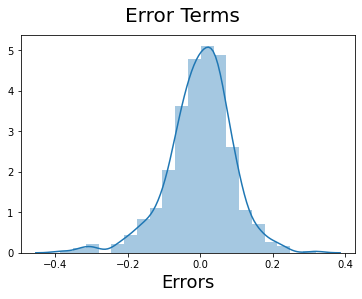

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

The error terms display a normal distribution with mean centered around zero.

## Step 6: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [66]:
# Adding constant variable to test dataframe
num_vars = num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
print(df_test[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])


          temp     atemp      hum  windspeed   cnt
184  29.793347  33.27085  63.7917   5.459106  6043
535  32.082500  36.04875  59.2083   7.625404  6211
299  19.270000  22.85230  81.2917  13.250121  2659
221  31.433347  34.24915  42.4167  13.417286  4780
152  29.315000  32.19710  30.5000  19.583229  4968
..         ...       ...      ...        ...   ...
400  10.899153  13.22605  68.7917  11.791732  2947
702  19.509153  23.45270  73.3750  11.666643  6606
127  21.661653  25.94665  63.1667   5.000712  4333
640  26.957500  29.95665  79.3750   4.458569  7572
72   13.333897  16.60000  49.6957   9.174042  2046

[219 rows x 5 columns]


In [67]:
df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_Aug,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_LightSnow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.059361,...,0.036530,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.639269,0.027397,0.319635
std,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.236840,...,0.188034,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.481313,0.163612,0.467403
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
y_test = df_test.pop('cnt')
X_test = df_test

In [69]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [70]:
X_test.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_LightSnow,weathersit_Mist
184,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
535,0.901354,0.842587,0.610133,0.153728,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
299,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0.881625,0.795343,0.437098,0.339570,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
152,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [72]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [73]:
cmp = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
cmp

,Actual,Predicted
184,0.692706,0.390020
535,0.712034,0.925539
299,0.303382,0.398297
221,0.547400,0.605243
152,0.569029,0.626103
...,...,...
400,0.336516,0.387737
702,0.757478,0.707493
127,0.495973,0.524761
640,0.868615,0.819112


In case of multiple linear regression, model now fits a hyperplane defined by the following equation:

$ cnt = 0.244357 + 0.571678 \times temp -0.176354 \times hum -0.194470 \times windspeed + 0.074483 \times season\_summer + 0.125850 \times season\_winter + 0.228909 \times yr\_1 -0.038021 \times  mnth\_Jan -0.047122 \times mnth\_Jul + 0.094124 \times mnth\_Sep -0.098557 \times holiday\_1 -0.236244 \times weathersit\_LightSnow -0.051863 \times weathersit\_Mist $

## Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [74]:
# Evaluating the algorithms
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.07200220115284743
Mean Squared Error: 0.009360616204130517
Root Mean Squared Error: 0.0967502775403281


In [75]:
y_train_pred = lm.predict(X_train_lm)
SS_Residual = sum((y_train-y_train_pred)**2)
SS_Total =sum ((y_train-np.mean(y_train))**2)
r_squared = 1-(float(SS_Residual))/SS_Total
adjusted_r_squared = 1- (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train_new.shape[1]-1)
print("For train dataset, values for r-squared is: ", round(r_squared,3),'and value for adjusted-r-squared is: ',round(adjusted_r_squared,3))

For train dataset, values for r-squared is:  0.841 and value for adjusted-r-squared is:  0.838


In [76]:
y_test_pred = lm.predict(X_test_new)
SS_Residual = sum((y_test-y_test_pred)**2)
SS_Total =sum ((y_test-np.mean(y_test))**2)
r_squared = 1-(float(SS_Residual))/SS_Total
adjusted_r_squared = 1- (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test_new.shape[1]-1)
print("For test dataset, values for r-squared is: ", round(r_squared,3),'and value for adjusted-r-squared is: ',round(adjusted_r_squared,3))

For test dataset, values for r-squared is:  0.803 and value for adjusted-r-squared is:  0.79


In both cases, r-squared and adjusted-r-squared, the values for train and test datasets differ by approximately 4-5% showing a low difference, which can indicate a good fit.

In [77]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8029170032329543

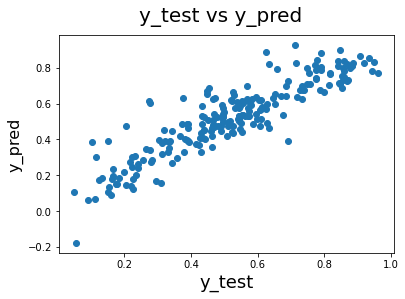

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

Linear relationship between y_test and y_pred indicates that the model is a good fit.